In [1]:
# deprecated, but works
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

## Part 1 - data augmentation

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### Augmented images example

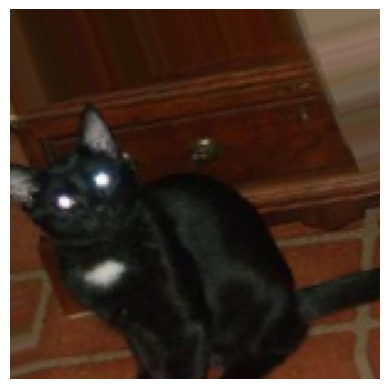

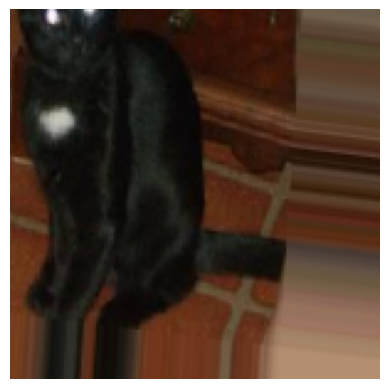

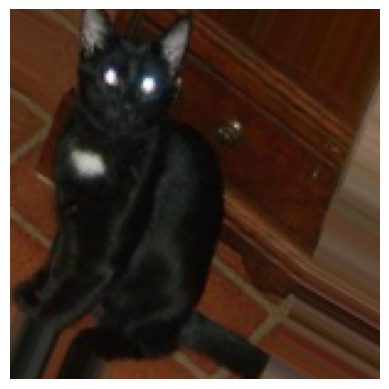

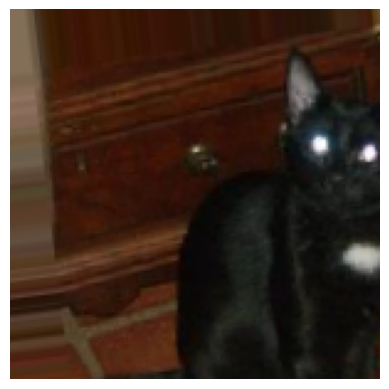

In [4]:
import os
from matplotlib import pyplot as plt

# This is module with image preprocessing utilities
from keras.preprocessing import image

train_cats_dir = "dataset_cats_dogs/train/cats"
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    plt.axis('off')
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1

    if i % 4 == 0:
        break

plt.show()

### Network architecture

In [5]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(74, 74, 32)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(36, 36, 64)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(17, 17, 128)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

opt = optimizers.RMSprop(learning_rate=1e-4)

model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the network

In [6]:
train_dir = "dataset_cats_dogs/train"
validation_dir = "dataset_cats_dogs/validation"

# Some parameters are changed compared to example
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Note that the validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir, # set target directory
    target_size=(150, 150), # resize images to 150x150 pixels
    batch_size=20, # experiment with different batches
    class_mode='binary' # labels needed for binary_crossentropy loss
)

validation_generator = test_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 177ms/step - accuracy: 0.4915 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.5232 - loss: 0.6917 - val_accuracy: 0.5520 - val_loss: 0.6803
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.5282 - loss: 0.6867 - val_accuracy: 0.5650 - val_loss: 0.6774
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.5646 - loss: 0.6821 - val_accuracy: 0.5660 - val_loss: 0.6751
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.5796 - loss: 0.6665 - val_accuracy: 0.5550 - val_loss: 0.7075
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.5971 - loss: 0.6650 - val_accuracy: 0.5210 - val_loss: 0.7159
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.5652 - loss: 0.6686 - val_accuracy: 0.6070 - val_loss: 0.6546
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.6244 -

### Plot training & validation accuracy

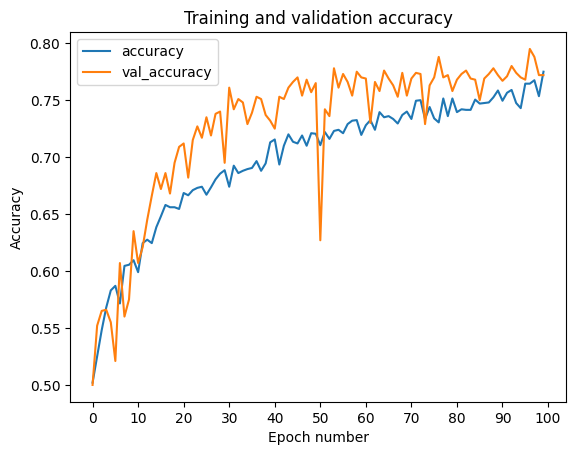

In [8]:
history_dict = history.history

plt.plot(history_dict['accuracy'], label='accuracy')
plt.plot(history_dict['val_accuracy'], label='val_accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.xticks([10*i for i in range(11)])
plt.legend()
plt.show()

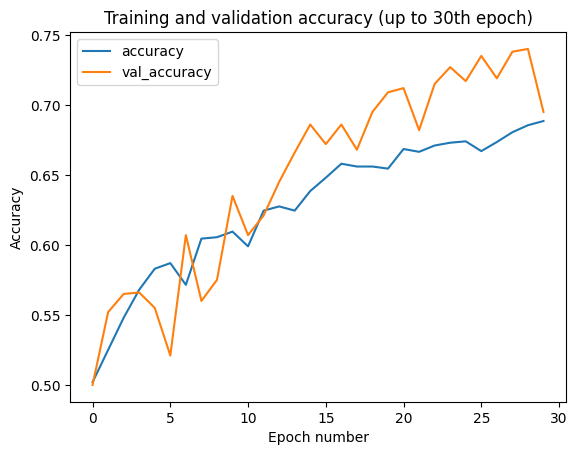

In [9]:
acc_30_epochs = history_dict['accuracy'][:30]
val_acc_30_epochs = history_dict['val_accuracy'][:30]

plt.plot(acc_30_epochs, label='accuracy')
plt.plot(val_acc_30_epochs, label='val_accuracy')

plt.title('Training and validation accuracy (up to 30th epoch)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.xticks([5*i for i in range(7)])
plt.legend()
plt.show()

## Part 2 - adding dropout layer

### Network architecture

In [10]:
# Previous model with dropout layers between convolutions and before FC layers
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(74, 74, 32)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(36, 36, 64)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(17, 17, 128)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

opt2 = optimizers.RMSprop(learning_rate=1e-4)

model2.compile(
    optimizer=opt2,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Training the model

In [11]:
# For comparison identical generators are used
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator2 = test_datagen2.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history2 = model2.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator2,
    validation_steps=50
)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.4948 - loss: 0.7524 - val_accuracy: 0.4970 - val_loss: 0.6931
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.5114 - loss: 0.7025 - val_accuracy: 0.5250 - val_loss: 0.6929
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.4992 - loss: 0.6969 - val_accuracy: 0.4970 - val_loss: 0.6928
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.4952 - loss: 0.6966 - val_accuracy: 0.5710 - val_loss: 0.6926
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.5099 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.4977 - loss: 0.6950 - val_accuracy: 0.5840 - val_loss: 0.6922
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - accuracy: 0.5175 - loss: 0.6925 - val_accuracy: 0.5660 - val_loss: 0.6921
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.5070 -

### Plot results

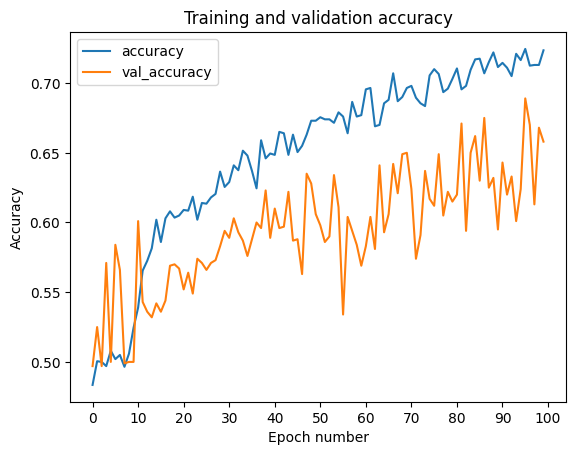

In [13]:
history_dict2 = history2.history

plt.plot(history_dict2['accuracy'], label='accuracy')
plt.plot(history_dict2['val_accuracy'], label='val_accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.xticks([10*i for i in range(11)])
plt.legend()
plt.show()

#### Comment on the results

Results with dropout & data augmentation are far worse than with only augmentation. Training accuracy for 100 epochs is similar, slightly lower, but validation accuracy is lower by 10 percent points (!) and extremely unstable.

Possibly the dropout application was not the best, but I was experimenting with it.